In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Histogram of chrges')

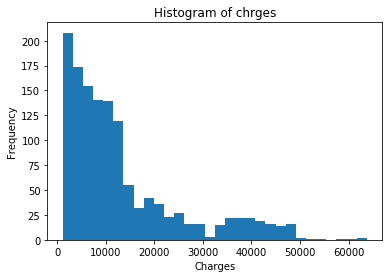

In [12]:
plt.hist(df.charges, bins = 30);
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of chrges")

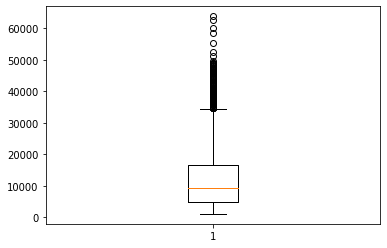

In [14]:
plt.boxplot(df.charges);

In [15]:
import numpy as np

In [19]:
a = np.array([7,9, 10, 12,15, 8])
np.mean(a), np.std(a), np.median(a)

(10.166666666666666, 2.6718699236468995, 9.5)

In [20]:
a = np.array([7,9, 10, 12,15, 8, 100])
np.mean(a), np.std(a), np.median(a)

(23.0, 31.532296368734617, 10.0)

In [23]:
q1, q2, q3 = np.percentile(a, [25, 50, 75])
iqr = q3 - q1
iqr

5.0

In [27]:
def is_outlier(a):
    q1, q3 = np.percentile(a, [25, 75])
    iqr = q3 - q1
    upper_whishker = min(np.max(a), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(a), q1 - 1.5 * iqr)
    print("Outlier boundary: ", (lower_whisker, upper_whishker))
    return (a>upper_whishker) | (a<lower_whisker)

In [28]:
is_outlier(a)

Outlier boundary:  (7, 21.0)


array([False, False, False, False, False, False,  True])

In [29]:
a

array([  7,   9,  10,  12,  15,   8, 100])

In [31]:
df[is_outlier(df.charges)]

Outlier boundary:  (1121.8739, 34489.350562499996)


,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [32]:
df[is_outlier(df.charges)].shape

Outlier boundary:  (1121.8739, 34489.350562499996)


(139, 7)

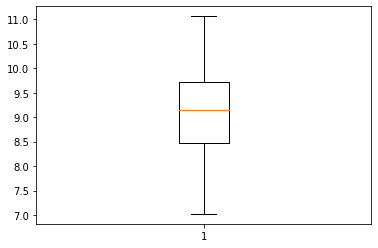

In [34]:
plt.boxplot(np.log(df.charges));

In [35]:
df[is_outlier(np.log(df.charges))].shape

Outlier boundary:  (7.02275569117477, 11.063044851063491)


(0, 7)

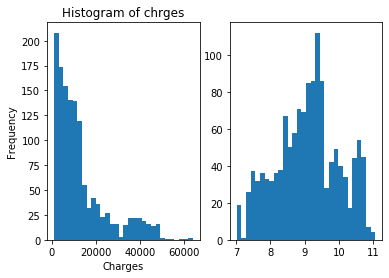

In [44]:
# plt.figure(figsize=(5,10))
plt.subplot(1, 2, 1)

plt.hist(df.charges, bins = 30);
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of chrges")

plt.subplot(1, 2, 2)
plt.hist(np.log(df.charges), bins = 30);


In [45]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Frequency plot')

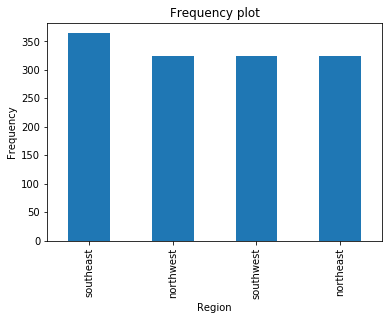

In [47]:
df.region.value_counts().plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot")

Text(0.5, 1.0, 'Frequency plot')

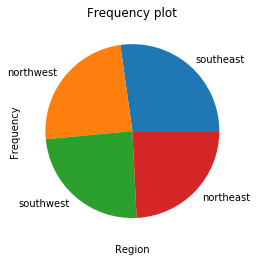

In [48]:
df.region.value_counts().plot.pie()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot")

Text(0.5, 1.0, 'Frequency plot')

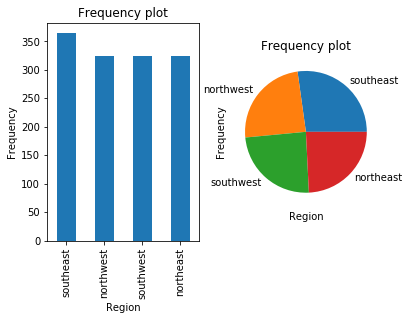

In [49]:
plt.subplot(1, 2, 1)

df.region.value_counts().plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot")

plt.subplot(1, 2, 2)
df.region.value_counts().plot.pie()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot")

Text(0.5, 1.0, 'Scatter plot, charges vs age')

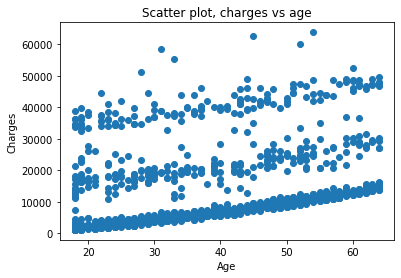

In [52]:
plt.scatter(df.age, df.charges)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter plot, charges vs age")

Text(0.5, 1.0, 'Scatter plot, charges vs age')

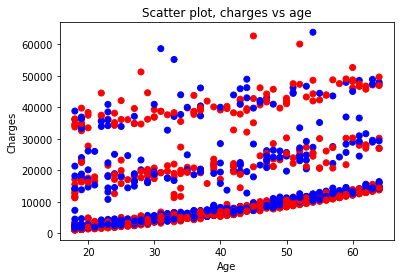

In [53]:
colors = np.where(df.gender == "male", "red", "blue")
plt.scatter(df.age, df.charges, color = colors)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter plot, charges vs age")

Text(0.5, 1.0, 'Scatter plot, charges vs age')

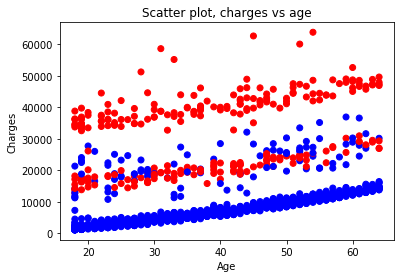

In [54]:
colors = np.where(df.smoker == "yes", "red", "blue")
plt.scatter(df.age, df.charges, color = colors)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter plot, charges vs age")

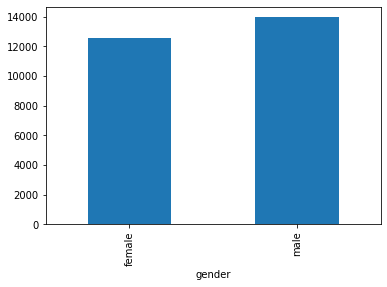

In [55]:
df.groupby("gender").charges.mean().plot.bar()

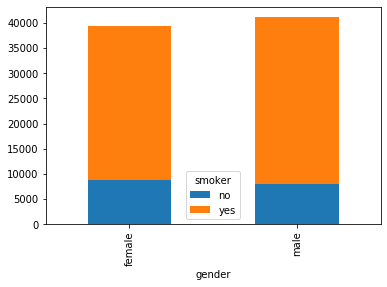

In [77]:
df.groupby(["gender", "smoker"]).charges.mean().unstack().plot.bar(stacked=True)

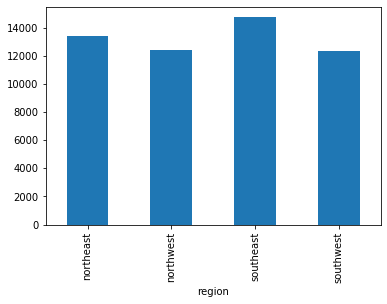

In [56]:
df.groupby("region").charges.mean().plot.bar()

In [58]:
import seaborn as sns

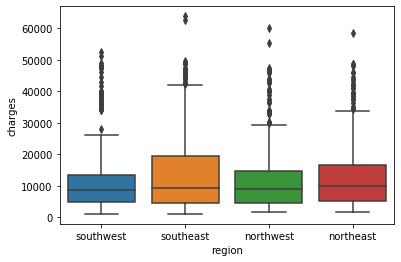

In [59]:
sns.boxplot("region", "charges", data=df)

In [68]:
agg = df.groupby(["region", "gender"]).charges.mean().unstack()

In [69]:
agg

gender,female,male
region,,
northeast,12953.203151,13854.005374
northwest,12479.870397,12354.119575
southeast,13499.669243,15879.617173
southwest,11274.411264,13412.883576


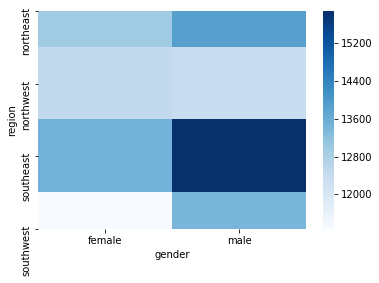

In [74]:
sns.heatmap(agg, cmap="Blues")